In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liafitriyanti","key":"685d3bbe49ae5d471c243cf089bbce28"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d sajidsaifi/prostate-cancer

Dataset URL: https://www.kaggle.com/datasets/sajidsaifi/prostate-cancer
License(s): other
  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 4.74MB/s]


In [4]:
!mkdir prostate-cancer
!unzip prostate-cancer.zip -d prostate-cancer
!ls prostate-cancer

Archive:  prostate-cancer.zip
  inflating: prostate-cancer/Prostate_Cancer.csv  
Prostate_Cancer.csv


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [6]:
df = pd.read_csv('prostate-cancer/Prostate_Cancer.csv')

In [7]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [8]:
df = df.drop(columns=['id'])

In [9]:
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis_result'] = le.fit_transform(df['diagnosis_result'])
df['smoothness'] = le.fit_transform(df['smoothness'])
df['compactness'] = le.fit_transform(df['compactness'])
df['symmetry'] = le.fit_transform(df['symmetry'])
df['fractal_dimension'] = le.fit_transform(df['fractal_dimension'])

In [12]:
df.to_csv('cancer_prostate.csv')

In [13]:
df['diagnosis_result'].value_counts()

diagnosis_result
1    62
0    38
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   diagnosis_result   100 non-null    int64
 1   radius             100 non-null    int64
 2   texture            100 non-null    int64
 3   perimeter          100 non-null    int64
 4   area               100 non-null    int64
 5   smoothness         100 non-null    int64
 6   compactness        100 non-null    int64
 7   symmetry           100 non-null    int64
 8   fractal_dimension  100 non-null    int64
dtypes: int64(9)
memory usage: 7.2 KB


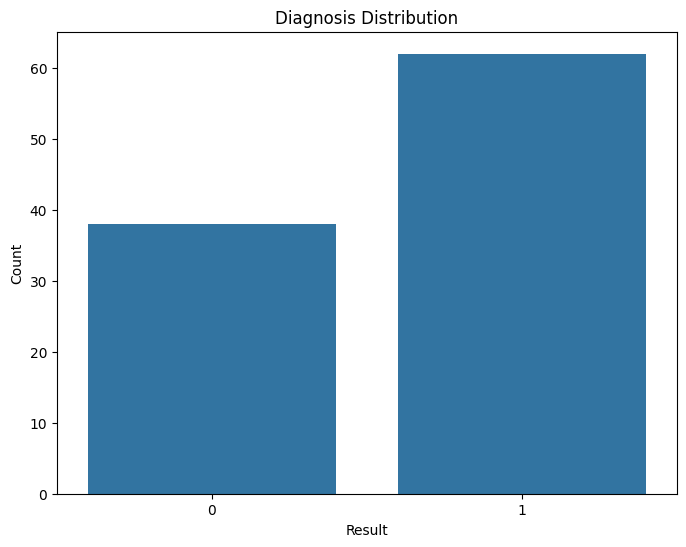

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis_result', data=df)
plt.title('Diagnosis Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [16]:
X = df.drop("diagnosis_result",axis=1)
Y = pd.get_dummies(df['diagnosis_result'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [18]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (75, 8)
Shape of Y_train is: (75, 2)

Shape of X_test is: (25, 8)
Shape of Y_test is: (25, 2)


In [19]:
input_dim = X.shape[1]

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [21]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
result = model.fit(X_train, Y_train, epochs = 20, batch_size = 10)

Epoch 1/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.8400
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.8400
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6282 - accuracy: 0.8533
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6255 - accuracy: 0.8400
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.7600
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6263 - accuracy: 0.8533
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.8133
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6028 - accuracy: 0.8267
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 0.5992 - accuracy: 0.8533
Epoch 10/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6011 - accuracy: 0.7867
Epoch 11/20
8/8 [======================

In [27]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

1/1 [==============================] - 0s 26ms/step


In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.76


In [29]:
model.save('./cancer-prostate.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = tf.keras.models.load_model('./cancer-prostate.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./cancer-prostate.tflite", "wb").write(tflite_model)

2580